In [2]:
## Parte 1
# Primero que nada, realizamos la limpieza de la base de datos.

import pandas as pd

df_04 = pd.read_stata('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T104.dta')
df_24 = pd.read_excel('C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T124.xlsx', engine='openpyxl')

In [3]:
df_04.columns = df_04.columns.str.lower()
df_24.columns = df_24.columns.str.lower()

In [4]:
# Identificamos distintas variables con problemas de codificación, y son las siguientes:
variables_con_problemas = ['deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr']

for var in variables_con_problemas:
    # Revisamos los valores únicos en 2004
    val_04 = set(df_04[var].dropna().unique())
    # Revisamos los valores únicos en 2024
    val_24 = set(df_24[var].dropna().unique())
    
    print(f"Valores únicos para la variable '{var}':")
    print(f"  - 2004: {val_04}")
    print(f"  - 2024: {val_24}")
    print("-" * 40)

Valores únicos para la variable 'deccfr':
  - 2004: {'08', '07', '00', '09', '06', '05', '01', '03', '04', '10', '02'}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores únicos para la variable 'ideccfr':
  - 2004: {'07', '08', '00', '09', '  ', '06', '05', '01', '03', '04', '10', '02'}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores únicos para la variable 'rdeccfr':
  - 2004: {'08', '00', '07', '09', '06', '05', '01', '03', '04', '10', '02'}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores únicos para la variable 'gdeccfr':
  - 2004: {'08', '00', '07', '09', '  ', '06', '05', '01', '03', '04', '10', '02'}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores únicos para la variable 'pdeccfr':
  - 2004: {'07', '08', '00', '09', '  ', '06', '05', '01',

In [13]:
## Vemos que hay diferencias de codificación entre las variables.
# El paso siguiente es realizar la homogeinización de aquellas variables de la lista, para poder realizar la limpieza.

def homogeneizar_variable(df, var):
    df[var] = df[var].replace(' ', pd.NA)
    df[var] = pd.to_numeric(df[var], errors='coerce')

# Homogeneizamos cada variable
variables_con_problemas = ['deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr']

for var in variables_con_problemas:
    homogeneizar_variable(df_04, var)
    df_24[var] = pd.to_numeric(df_24[var], errors='coerce')

# Verificamos los resultados
for var in variables_con_problemas:
    print(f"Valores homogéneos para la variable '{var}':")
    print(f"  - 2004: {set(df_04[var].dropna().unique())}")
    print(f"  - 2024: {set(df_24[var].dropna().unique())}")
    print("-" * 40)

Valores homogéneos para la variable 'deccfr':
  - 2004: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores homogéneos para la variable 'ideccfr':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores homogéneos para la variable 'rdeccfr':
  - 2004: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
  - 2024: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}
----------------------------------------
Valores homogéneos para la variable 'gdeccfr':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0}
----------------------------------------
Valores homogéneos para la variable 'pdeccfr':
  - 2004: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
  - 2024: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 

In [5]:
common_columns = df_04.columns.intersection(df_24.columns)
df_04 = df_04[common_columns]
df_24 = df_24[common_columns]

df_04.loc[:, 'anio'] = 2004
df_24.loc[:, 'anio'] = 2024

df_final = pd.concat([df_04, df_24], ignore_index=True)

In [6]:
df_final.to_csv('C:\\Users\\54115\\Desktop\\Python\\TP2\\EPH_2004_2024_unificada.csv', index=False)

C:\Users\54115\AppData\Local\Temp\ipykernel_6980\3863203135.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_gba = pd.concat([df_04_gba, df_24_gba], ignore_index=True)


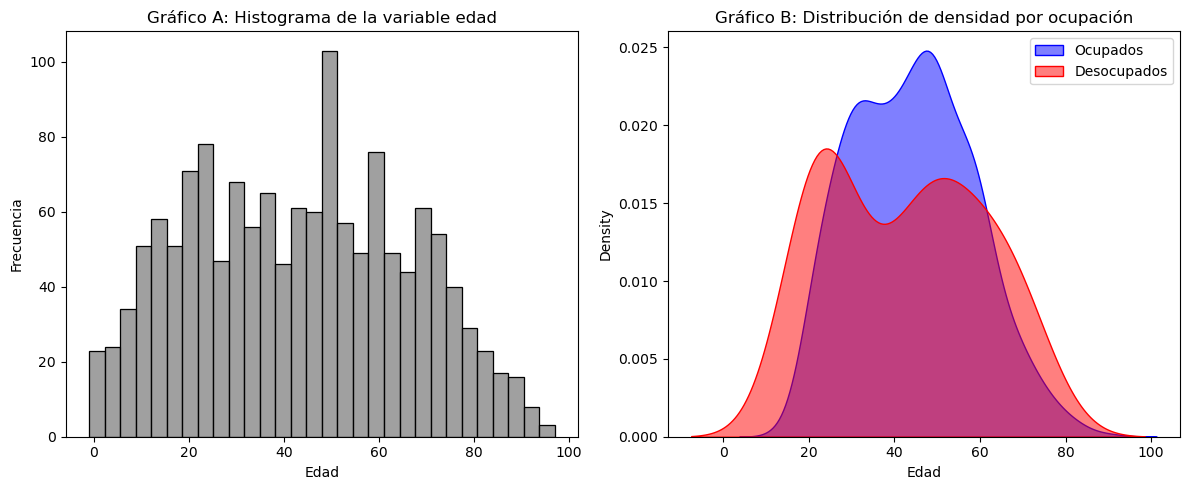

In [8]:
## Parte 1 - Ejercicio 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_04_gba = df_04[df_04['aglomerado'] == 32].copy()
df_24_gba = df_24[df_24['aglomerado'] == 32].copy()

df_04_gba['ch06'] = df_04_gba['ch06'].replace("Menos de 1 año", 0)
df_04_gba['ch06'] = pd.to_numeric(df_04_gba['ch06'], errors='coerce') # Codificamos los datos de edad de 2004, de tipo "Categorical", a tipo numérico
df_04_gba['edad2'] = df_04_gba['ch06'] ** 2

df_24_gba['ch06'] = df_24_gba['ch06'].replace("Menos de 1 año", 0)
df_24_gba['ch06'] = pd.to_numeric(df_24_gba['ch06'], errors='coerce') # Codificamos los datos de edad de 2024, de tipo "Categorical", a tipo numérico
df_24_gba['edad2'] = df_24_gba['ch06'] ** 2

# Concatenamos ambas bases
df_gba = pd.concat([df_04_gba, df_24_gba], ignore_index=True)

# Panel A: Histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['ch06'].dropna(), bins=30, kde=False, color='grey')
plt.title("Gráfico A: Histograma de la variable edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Panel B: Distribución kernel para ocupados y desocupados
plt.subplot(1, 2, 2)

ocupados = df[df['estado'] == 1]['ch06']
desocupados = df[df['estado'] == 2]['ch06']

sns.kdeplot(ocupados.dropna(), label='Ocupados', color='blue', fill=True, alpha=0.5)
sns.kdeplot(desocupados.dropna(), label='Desocupados', color='red', fill=True, alpha=0.5)

plt.title("Gráfico B: Distribución de densidad por ocupación")
plt.xlabel("Edad")
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import numpy as np

def crear_variable_educ(df_gba):
    df['educ'] = np.empty(df.shape[0], dtype=float)
    
    # Asegurar nombres en minúscula
    df.columns = df.columns.str.lower()

    # Definir mapeo para niveles finalizados
    nivel_a_anios = {
        1: 1,     # Jardín
        2: 7,     # Primaria
        3: 9,     # EGB
        4: 12,    # Secundaria
        5: 12,    # Polimodal
        6: 14,    # Terciario
        7: 17,    # Universitario
        8: 20,    # Posgrado
        9: np.nan,   # Educación especial
        98: np.nan,  # Educación especial
        99: np.nan   # Ns/Nr
    }

    # Convertir a numéricos
    df['ch12'] = pd.to_numeric(df['ch12'], errors='coerce')
    df['ch13'] = pd.to_numeric(df['ch13'], errors='coerce')
    df['ch14'] = pd.to_numeric(df['ch14'], errors='coerce')

    # Inicializar columna educ
    df['educ'] = np.nan

    # Si completó el nivel, asignar años según mapeo
    df.loc[df['ch13'] == 1, 'educ'] = df.loc[df['ch13'] == 1, 'ch12'].map(nivel_a_anios)

    # Si no completó el nivel, usar el último año aprobado
    df.loc[df['ch13'] == 2, 'educ'] = df.loc[df['ch13'] == 2, 'ch14']

    return df

df_gba = crear_variable_educ(df_gba)

C:\Users\54115\AppData\Local\Temp\ipykernel_6980\4149498742.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['educ'] = np.empty(df.shape[0], dtype=float)


In [22]:
# Realizamos la estadística descriptiva, y creamos un DataFrame aparte para una mejor visualización.

descripcion_educ = df['educ'].describe()
df_descripcion_educ = descripcion_educ.to_frame().T
df_descripcion_educ.columns = ['conteo', 'promedio', 'desvío estándar', 'min', '25%', '50%', '75%', 'max']
df_descripcion_educ['promedio'] = df_descripcion_educ['promedio'].round(1)
df_descripcion_educ['desvío estándar'] = df_descripcion_educ['desvío estándar'].round(1)
df_descripcion_educ
## La variable 'educ' muestra los años de educación formal. Los datos de la estadística arrojan un promedio de 8 años, con un desvío estándar de 11,6. El 50% de las observaciones tuvieron 7 años de educación formal.

,conteo,promedio,desvío estándar,min,25%,50%,75%,max
educ,1395.0,10.4,11.9,0.0,3.0,12.0,14.0,99.0


In [ ]:
#parte 1, ejercicio 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Creo la variable salario_semanal
# Divido ingresos habituales (P21) por 40 para obtener el salario semanal
df['salario_semanal'] = df['P21'] / 40

# Ajusto los pesos de 2004 a pesos de 2024
# Ajustar los pesos de 2004 a pesos de 2024
indice_ajuste = 822.2
df['salario_semanal_ajustado'] = df['salario_semanal']
df.loc[df['anio'] == 2004, 'salario_semanal_ajustado'] *= indice_ajuste

# Creo un histograma de salario_semanal_ajustado (Panel A)
plt.figure(figsize=(10, 6))
sns.histplot(df['salario_semanal_ajustado'], kde=False, bins=30, color='blue')
plt.title("Histograma de Salario Semanal Ajustado")
plt.xlabel("Salario Semanal Ajustado (Pesos de 2024)")
plt.ylabel("Frecuencia")
plt.show()

# Creo distribuciones de kernel para ocupados y desocupados (Panel B)
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['ocupacion'] == 'ocupado', 'salario_semanal_ajustado'], label="Ocupados", shade=True, color='green')
sns.kdeplot(df.loc[df['ocupacion'] == 'desocupado', 'salario_semanal_ajustado'], label="Desocupados", shade=True, color='red')
plt.title("Distribución de Kernel de Salarios para Ocupados y Desocupados")
plt.xlabel("Salario Semanal Ajustado (Pesos de 2024)")
plt.ylabel("Densidad")
plt.legend()
plt.show()